In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

# ensure is in parent directory
try:
    print(os.getcwd())
    os.chdir("../../rug-hr/")
    print(os.getcwd())
except:
    pass

c:\Users\mo\Documents\Organisations\RUG\rug-hr\experiments
c:\Users\mo\Documents\Organisations\RUG\rug-hr


Predicting ./datasets/IAM-data/img\a06-064-02.png
torch.Size([2, 64, 1191]) tensor(1.) tensor(0.)
(64, 1191)


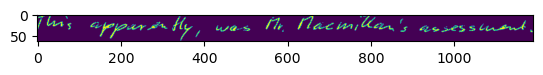

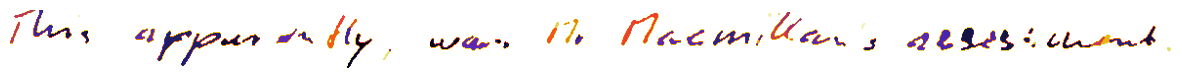

(64, 1191) 34 labels are present
Thus ' s a pu ur a anan HNhy ,f w a sx s I1 Ae Na c m i;i 'RXRXea nan 's a e se s s3 u ucsS8on t . 


In [62]:
from modules.iam import LightSegLMIAM
from modules.iam.postprocessing import transcribe_image
from modules.scripturize.utils.plot import show_labelled_manuscript
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

model = LightSegLMIAM().to(device)
model.load("./models/seglm-masked-v3-128x1024-iam.pt")

dataset_paths = glob("./datasets/IAM-data/img/*")
# dataset_paths = glob("./datasets/handwitten_manuscripts/Raw/*")
sample_path = np.random.choice(dataset_paths)

print("Predicting", sample_path)

predictions = model.predict(im_path=sample_path)
print(predictions.shape)

show_labelled_manuscript(predictions, interactive=False, random_crop_size=False)
plt.show()

transcription = transcribe_image(predictions)
print(transcription)
Image.fromarray(predictions.astype(np.int16)).save(
    f"./datasets/iam_outputs/{np.random.randint(0, 1000)}.png")